In [28]:
import numpy as np 
from numpy import mean
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import random

In [29]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [30]:
from sklearn.linear_model import LogisticRegression 

In [31]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
data = pd.read_csv('all_data_selected_atc.level3.softmax.csv')
data.head(20)

,ses,missing_p,missing_m,asd_status,pagediff,count_drugs_scaled.x,count_drugs_scaled.y,A01A.x,A02A.x,A02B.x,...,S01L.y,J04B.y,L01C.y,A16A.y,M03A.y,M03C.y,C02K.y,G03X.y,V06D.y,P01C.y
0,13,0,0,0,0.999897,0.895041,0.618994,0.368953,0.759557,0.989699,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
1,15,0,0,1,1.000000,0.999662,0.004798,0.115034,0.711333,0.730141,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
2,15,0,0,0,1.000000,0.575656,0.910726,0.041941,0.081338,0.959360,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
3,7,0,0,0,1.000000,0.088910,0.998226,0.948569,0.081338,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
4,8,0,0,0,0.999999,0.020457,0.559284,0.142702,0.988533,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
5,2,0,0,0,0.866756,0.006496,0.008993,0.516815,0.081338,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
6,6,0,0,0,0.948636,0.059191,0.940504,0.650602,0.081338,0.878085,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
7,11,0,0,0,0.999707,0.003899,0.217287,0.997895,0.081338,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
8,11,0,0,0,0.999167,0.028389,0.893161,0.121904,0.986466,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
9,14,0,0,0,0.993328,0.050460,0.884161,0.969831,0.081338,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33131 entries, 0 to 33130
Columns: 422 entries, ses to P01C.y
dtypes: float64(418), int64(4)
memory usage: 106.7 MB


In [35]:
data.describe()

,ses,missing_p,missing_m,asd_status,pagediff,count_drugs_scaled.x,count_drugs_scaled.y,A01A.x,A02A.x,A02B.x,...,S01L.y,J04B.y,L01C.y,A16A.y,M03A.y,M03C.y,C02K.y,G03X.y,V06D.y,P01C.y
count,33131.000000,33131.000000,33131.0,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,...,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000,33131.000000
mean,8.595062,0.021068,0.0,0.036642,0.429112,0.464366,0.456717,0.500363,0.433324,0.419875,...,0.490883,0.489689,0.491959,0.487748,0.492529,0.494040,0.494213,0.494226,0.495700,0.493961
std,4.151570,0.143613,0.0,0.187885,0.357929,0.368759,0.365726,0.347627,0.405460,0.354984,...,0.006255,0.006868,0.005583,0.009751,0.005576,0.003931,0.003930,0.003930,0.002771,0.003932
min,1.000000,0.000000,0.0,0.000000,0.034061,0.001336,0.004041,0.000098,0.081338,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
25%,5.000000,0.000000,0.0,0.000000,0.091003,0.093922,0.092564,0.160996,0.081338,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
50%,8.000000,0.000000,0.0,0.000000,0.221328,0.400734,0.396960,0.492849,0.081338,0.108073,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
75%,12.000000,0.000000,0.0,0.000000,0.866756,0.857755,0.847652,0.846673,0.903853,0.788562,...,0.490806,0.489597,0.491898,0.487562,0.492468,0.494009,0.494183,0.494195,0.495685,0.493931
max,20.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
feature_names = list(data.columns.values)
feature_names.remove('asd_status')
X = data[feature_names]
Y = data['asd_status']

X.drop(["missing_p", "missing_m"], axis = 1, inplace = True)

In [49]:
X_select = X[['count_drugs_scaled.y','C02C.x','H01A.x','N06B.x','V04C.x', 'A07B.y', 'B02B.y', 'B03B.y', 'C01C.y', 'J06B.y','N02B.y' ,'S02D.y', 'C01B.y', 'G03F.y', 'S01F.y', 'A03D.y', 'M05B.y', 'N04B.y' ,'N02C.y']]

In [50]:
X_select

,count_drugs_scaled.y,C02C.x,H01A.x,N06B.x,V04C.x,A07B.y,B02B.y,B03B.y,C01C.y,J06B.y,N02B.y,S02D.y,C01B.y,G03F.y,S01F.y,A03D.y,M05B.y,N04B.y,N02C.y
0,0.618994,0.46572,0.447443,0.326213,0.343506,0.756914,0.899060,0.577537,0.189463,0.898507,0.166119,0.623002,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
1,0.004798,0.46572,0.447443,0.999989,0.999156,0.165726,0.098065,1.000000,0.029029,0.100264,0.052407,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
2,0.910726,0.46572,0.447443,0.999931,0.343506,0.165726,0.098065,0.582411,0.029029,0.100264,0.426081,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
3,0.998226,0.46572,0.447443,0.326213,0.343506,0.953873,0.564634,0.622824,0.490326,0.566439,0.379561,0.709612,0.962341,0.457291,0.459170,0.455622,0.461328,0.481913,0.429585
4,0.559284,0.46572,0.447443,0.326213,0.343506,0.674060,0.822254,0.232424,0.146878,0.822033,0.191499,0.936775,0.892233,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33126,0.401050,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.481887,0.100264,0.414307,0.346048,0.199759,0.457291,0.404893,0.455622,0.461328,0.481913,0.429585
33127,0.401050,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.481887,0.100264,0.414307,0.346048,0.199759,0.457291,0.404893,0.455622,0.461328,0.481913,0.429585
33128,0.401050,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.481887,0.100264,0.414307,0.346048,0.199759,0.457291,0.404893,0.455622,0.461328,0.481913,0.429585
33129,0.401050,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.481887,0.100264,0.414307,0.346048,0.199759,0.457291,0.404893,0.455622,0.461328,0.481913,0.429585


In [51]:
# Class Imbalance Treatment with SMOTE, Test-Train Split 

X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size=0.2, random_state=1)

#print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [52]:
random.seed(1) 
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train, Y_train = pipeline.fit_resample(X_train, Y_train)
# summarize the new class distribution
counter = Counter(Y_train)
print(counter)

Counter({0: 5106, 1: 2553})


In [53]:
def performance(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN) 
    
    print('Sensitivity : ', TPR)
    print('Specificity : ', TNR)
    print('Precision : ', PPV)
    print('Negative predictive value : ', NPV)
    print('False positive rate : ', FPR)
    print('False negative rate : ', FNR)
    print('False discovery rate : ', FDR)
    print('Accuracy : ', ACC)

In [54]:
def model_auc(model): 
    # values to evaluate
    # k_values = [1, 2, 3, 4, 5, 6, 7]

    k_values = [5]
    for k in k_values:
        # define pipeline
        model = model
        over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
        under = RandomUnderSampler(sampling_strategy=0.5)
        steps = [('over', over), ('under', under), ('model', model)]
        pipeline = Pipeline(steps=steps)
    
        # evaluate pipeline
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
        score = np.mean(scores)
        return (scores, score, k)

In [59]:
X_test

,count_drugs_scaled.y,C02C.x,H01A.x,N06B.x,V04C.x,A07B.y,B02B.y,B03B.y,C01C.y,J06B.y,N02B.y,S02D.y,C01B.y,G03F.y,S01F.y,A03D.y,M05B.y,N04B.y,N02C.y
9211,0.692502,0.46572,0.447443,0.326213,0.343506,0.847907,0.957680,0.652871,0.981390,0.957168,0.207154,0.992936,0.973296,0.457291,0.932590,0.455622,0.461328,0.481913,0.429585
14475,0.370897,0.46572,0.447443,0.989250,0.997595,0.947118,0.993224,0.232424,0.998616,0.993050,0.785408,0.999497,0.995228,0.457291,0.988466,0.455622,0.461328,0.481913,0.429585
16601,0.778577,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.029029,0.100264,0.785408,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
24000,0.027937,0.46572,0.447443,0.326213,0.999999,0.165726,0.098065,0.990584,0.029029,0.100264,0.052407,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
32716,0.401050,0.46572,0.447443,0.999875,0.343506,0.165726,0.098065,0.232424,0.481887,0.100264,0.414307,0.346048,0.199759,0.457291,0.404893,0.455622,0.461328,0.481913,0.429585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15136,0.013029,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,1.000000,0.029029,0.100264,0.052407,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
27598,0.210503,0.46572,0.447443,0.326213,0.343506,0.926216,0.988093,0.232424,0.398501,0.987836,0.052407,0.998873,0.991910,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
7324,0.670492,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.029029,0.100264,0.780354,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
8805,0.884161,0.46572,0.447443,0.326213,0.343506,0.841066,0.954168,0.646376,0.801489,0.953640,0.052407,0.750994,0.199759,0.457291,0.495310,0.455622,0.461328,0.481913,0.429585


In [64]:
# Train model 
log_model = LogisticRegression(solver = 'liblinear')
scores, score, k = model_auc(log_model)

print('Logistic Regression (k=%d), Mean ROC AUC: %.3f (+/- %0.3f)' % (k, np.mean(scores), np.std(scores) *2))

Logistic Regression (k=5), Mean ROC AUC: 0.719 (+/- 0.047)


In [65]:
X_test

,count_drugs_scaled.y,C02C.x,H01A.x,N06B.x,V04C.x,A07B.y,B02B.y,B03B.y,C01C.y,J06B.y,N02B.y,S02D.y,C01B.y,G03F.y,S01F.y,A03D.y,M05B.y,N04B.y,N02C.y
9211,0.692502,0.46572,0.447443,0.326213,0.343506,0.847907,0.957680,0.652871,0.981390,0.957168,0.207154,0.992936,0.973296,0.457291,0.932590,0.455622,0.461328,0.481913,0.429585
14475,0.370897,0.46572,0.447443,0.989250,0.997595,0.947118,0.993224,0.232424,0.998616,0.993050,0.785408,0.999497,0.995228,0.457291,0.988466,0.455622,0.461328,0.481913,0.429585
16601,0.778577,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.029029,0.100264,0.785408,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
24000,0.027937,0.46572,0.447443,0.326213,0.999999,0.165726,0.098065,0.990584,0.029029,0.100264,0.052407,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
32716,0.401050,0.46572,0.447443,0.999875,0.343506,0.165726,0.098065,0.232424,0.481887,0.100264,0.414307,0.346048,0.199759,0.457291,0.404893,0.455622,0.461328,0.481913,0.429585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15136,0.013029,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,1.000000,0.029029,0.100264,0.052407,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
27598,0.210503,0.46572,0.447443,0.326213,0.343506,0.926216,0.988093,0.232424,0.398501,0.987836,0.052407,0.998873,0.991910,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
7324,0.670492,0.46572,0.447443,0.326213,0.343506,0.165726,0.098065,0.232424,0.029029,0.100264,0.780354,0.067890,0.199759,0.457291,0.070222,0.455622,0.461328,0.481913,0.429585
8805,0.884161,0.46572,0.447443,0.326213,0.343506,0.841066,0.954168,0.646376,0.801489,0.953640,0.052407,0.750994,0.199759,0.457291,0.495310,0.455622,0.461328,0.481913,0.429585


In [66]:
log_model.fit(X_train, Y_train)
Y_pred = log_model.predict(X_test)
cm_log = confusion_matrix(Y_test, Y_pred)
print(cm_log)

[[5967  420]
 [ 159   81]]


In [67]:
Y_pred2=log_model.predict([[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]])
Y_pred2

array([0])

In [68]:
performance(cm_log)

Sensitivity :  0.3375
Specificity :  0.9342414279004227
Precision :  0.16167664670658682
Negative predictive value :  0.9740450538687562
False positive rate :  0.06575857209957726
False negative rate :  0.6625
False discovery rate :  0.8383233532934131
Accuracy :  0.9126301493888638


In [69]:
## Classification Report 

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6387
           1       0.16      0.34      0.22       240

    accuracy                           0.91      6627
   macro avg       0.57      0.64      0.59      6627
weighted avg       0.94      0.91      0.93      6627



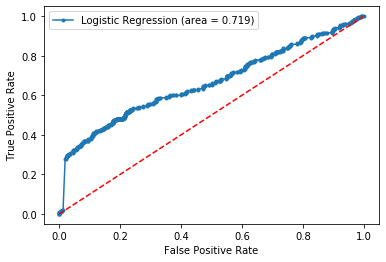

In [70]:
def draw_roc(model, legend):
    # predict probabilities
    prob = model.predict_proba(X_test)
    prob = prob[:, 1]
    #lr_auc = roc_auc_score(Y_test, lr_probs)
    #print('Logistic: ROC AUC=%.3f' % (lr_auc))
    fpr, tpr, thresholds = roc_curve(Y_test, prob)
    plt.plot(fpr, tpr, marker='.', label= legend + ' (area = %0.3f)' % np.mean(scores))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

draw_roc(log_model, "Logistic Regression")

In [71]:
# Serializing our model to a file called log_model.joblib

import joblib
joblib.dump(log_model, "NNmodel/log_model.joblib", compress=True)

            

['NNmodel/log_model.joblib']